In [91]:
# Self Organizing Map

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

In [92]:
dataset = pd.read_csv('data/australian.csv', sep=' ', header=None)
cid = [i for i in range(dataset.values.shape[0])]
cid = pd.Series(cid)
dataset.insert(0, 'client id', cid)
#print(dataset)

In [93]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [94]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [95]:
# training the SOM
from minisom import MiniSom 
inputlen = X.shape[1]
print(inputlen)
som = MiniSom(x=10, y=10, input_len=inputlen, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)

15


In [96]:
X.shape

(690, 15)

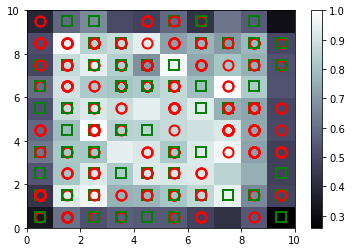

In [97]:
# Visualizing the result
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2
         )
show()

In [98]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,1)], mappings[(1,4)]), axis=0)
frauds = sc.inverse_transform(frauds)

In [99]:
frauds

array([[3.580e+02, 1.000e+00, 2.725e+01, 1.665e+00, 2.000e+00, 1.300e+01,
        8.000e+00, 5.085e+00, 1.000e+00, 1.000e+00, 9.000e+00, 0.000e+00,
        2.000e+00, 3.990e+02, 8.280e+02],
       [4.200e+02, 1.000e+00, 2.392e+01, 1.500e+00, 2.000e+00, 2.000e+00,
        8.000e+00, 1.875e+00, 1.000e+00, 1.000e+00, 6.000e+00, 0.000e+00,
        2.000e+00, 2.000e+02, 3.280e+02],
       [5.330e+02, 1.000e+00, 2.967e+01, 1.415e+00, 2.000e+00, 9.000e+00,
        8.000e+00, 7.500e-01, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 2.400e+02, 1.010e+02],
       [5.390e+02, 1.000e+00, 3.192e+01, 4.460e+00, 2.000e+00, 1.300e+01,
        8.000e+00, 6.040e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 3.110e+02, 3.010e+02],
       [5.610e+02, 1.000e+00, 4.325e+01, 3.000e+00, 2.000e+00, 1.100e+01,
        8.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 1.100e+01, 0.000e+00,
        2.000e+00, 8.000e+01, 1.000e+00],
       [6.140e+02, 1.000e+00, 4.192e+01, 4.200e-01